# ***Fashion MNIST***
Clasificación de Fashion-MNIST con una CNN simple en Keras
## ¿Por qué Fashion-MNIST?

* Es sencillo, sobreutilizado

Más información sobre el conjunto de datos Fashion-MINST en este documento [aquí](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)

Los datos [fashion_mnist](https://github.com/zalandoresearch/fashion-mnist):
son 60.000 datos de entrenamiento, y 10.000 de prueba con 10 categorías. Cada imagen a escala de grises.

<br> 0. Camiseta / top
<br> 1. Pantalón
<br> 2. Jersey
<br> 3. Vestido
<br> 4. Abrigo
<br> 5. Sandalia
<br> 6. Camisa
<br> 7. Zapatilla
<br> 8. Bolso
<br> 9. Botín

Cada imagen en escala de grises mide 28x28

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import scipy

In [5]:
(train_data, train_label), (test_data, test_label) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
print('Train data: ' + str(train_data.shape))
print('Train labels: ' + str(train_label.shape))
print('Test data:  '  + str(test_data.shape))
print('Test labels:  '  + str(test_label.shape))

Train data: (60000, 28, 28)
Train labels: (60000,)
Test data:  (10000, 28, 28)
Test labels:  (10000,)


In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


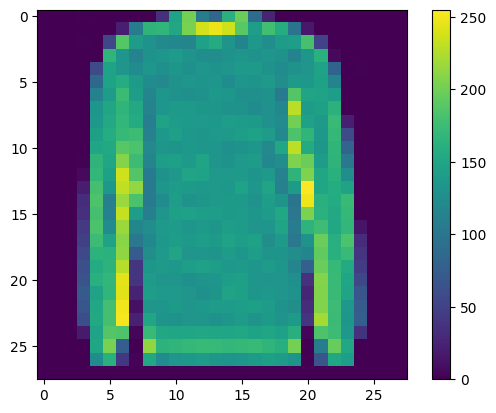

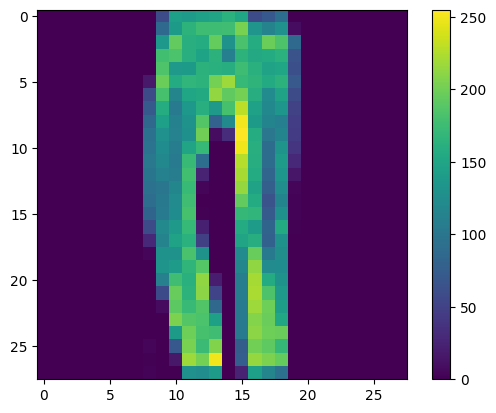

In [9]:
plt.imshow(train_data[45])
plt.colorbar()
plt.show()
plt.imshow(train_data[1500])
plt.colorbar()
plt.show()

y = 2 Jersey


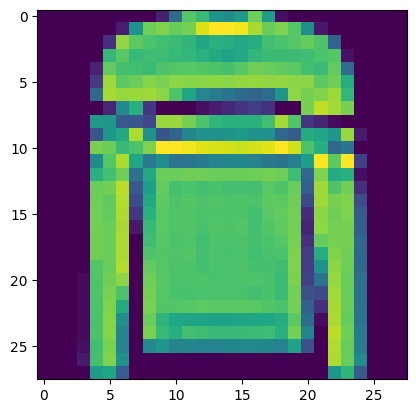

In [12]:
fashion_mnist_etiquetas = ["Camiseta / top",  # index 0
                        "Pantalón",           # index 1
                        "Jersey",             # index 2
                        "Vestido",            # index 3
                        "Abrigo",             # index 4
                        "Sandalia",           # index 5
                        "Camisa",             # index 6
                        "Zapatilla",          # index 7
                        "Bolso",              # index 8
                        "Botín"]              # index 9

img_index = 5
etiqueta_index = y_train[img_index]
print ("y = " + str(etiqueta_index) + " " +(fashion_mnist_etiquetas[etiqueta_index]))
plt.imshow(x_train[img_index])

## ***Normalización de datos***
Se normalizan las dimensiones de los datos para que tengan aproximadamente la misma escala.

In [13]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [14]:
print("Número de train_data - " + str(len(x_train)))
print("Número de test_data - " + str(len(x_test)))

Número de train_data - 60000
Número de test_data - 10000


## ***Dividir los datos en conjuntos de datos de entrenamiento/validación/prueba***

* Datos de entrenamiento - utilizados para entrenar el modelo
* Datos de validación - utilizados para ajustar los hiperparámetros
* Datos de prueba - utilizados para probar el modelo después de que éste haya pasado por el escrutinio inicial del conjunto de validación.

In [15]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [17]:
# Redimensión de 28x28 a [28,28,1]
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

In [18]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [19]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)


In [20]:
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

55000 train set
5000 validation set
10000 test set


## ***Crear la arquitectura del modelo***

Existen dos APIs para definir un modelo en Keras:
1. [API de modelo secuencial](https://keras.io/models/sequential/)
2. [API funcional](https://keras.io/models/model/)

En este cuaderno estamos utilizando la API de modelos secuenciales.
Si estás interesado en un tutorial usando la API Funcional, visita el blog de Sara Robinson [Predicting the price of wine with the Keras Functional API and TensorFlow](https://medium.com/tensorflow/predicting-the-price-of-wine-with-the-keras-functional-api-and-tensorflow-a95d1c2c1b03).

Para definir el modelo utilizaremos algunas de estas APIs de Keras:
* Conv2D() [link](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/) - crear una capa convolucional
* Pooling() [link](https://keras.io/layers/pooling/) - crea una capa de pooling
* Dropout() [link](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) - aplicar drop out

In [21]:
model = tf.keras.Sequential()

# Debe definirse la forma de entrada en la primera capa de la red neuronal
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       401,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

## ***Compilar el modelo***
Configurar el proceso de aprendizaje con la API compile() antes de entrenar el modelo. Recibe tres argumentos:

* Un optimizador
* Una función de pérdida
* Una lista de métricas

In [22]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## ***Entrenar el modelo***

Ahora vamos a entrenar el modelo con la API fit().

Usamos la API [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) para guardar el modelo después de cada epoch o época. Establecer "save_best_only = True" para guardar sólo cuando la precisión de validación mejora.

In [25]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=3,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/3
859/860 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8031 - loss: 0.5301
Epoch 1: val_loss improved from inf to 0.35608, saving model to model.weights.best.keras
860/860 ━━━━━━━━━━━━━━━━━━━━ 66s 77ms/step - accuracy: 0.8032 - loss: 0.5300 - val_accuracy: 0.8692 - val_loss: 0.3561
Epoch 2/3
859/860 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8502 - loss: 0.4065
Epoch 2: val_loss improved from 0.35608 to 0.31588, saving model to model.weights.best.keras
860/860 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.8502 - loss: 0.4064 - val_accuracy: 0.8822 - val_loss: 0.3159
Epoch 3/3
859/860 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8646 - loss: 0.3704
Epoch 3: val_loss improved from 0.31588 to 0.29053, saving model to model.weights.best.keras
860/860 ━━━━━━━━━━━━━━━━━━━━ 80s 75ms/step - accuracy: 0.8646 - loss: 0.3704 - val_accuracy: 0.8934 - val_loss: 0.2905


In [27]:
# Carga pesos con la mejor validación de precisión
# model.load_weights('model.weights.best.hdf5')
model.load_weights('model.weights.best.keras')

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test precisión:', score[1])


 Test precisión: 0.8876000046730042


## ***Visualizar predicción***
Ahora vamos a visualizar la predicción usando el modelo que acabamos de entrenar. Imprimimos 15 imágenes del conjunto de datos de prueba, y establecemos los títulos con la predicción (y la etiqueta verdadera groud).
Si la predicción coincide con la etiqueta verdadera, el título será verde; en caso contrario, se mostrará en rojo.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


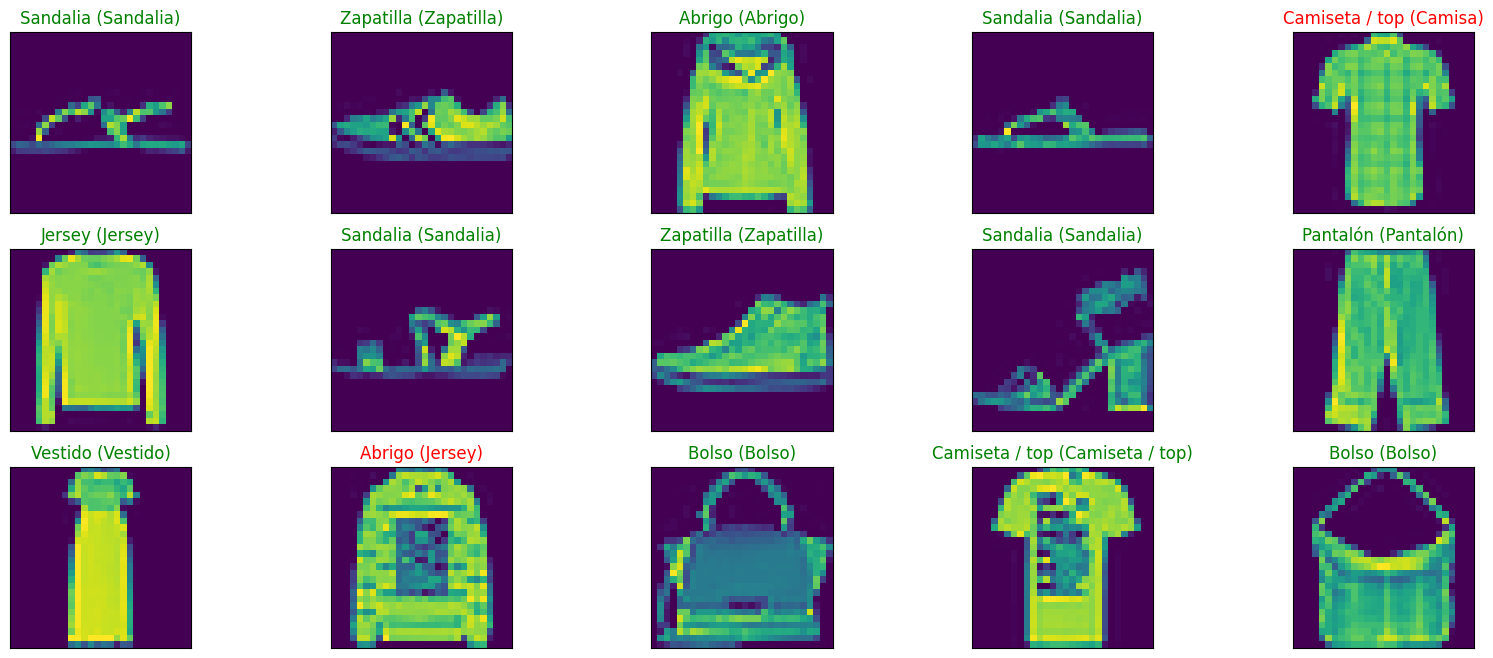

In [30]:
y_hat = model.predict(x_test)

# Traza una muestra aleatoria de 10 imágenes de prueba, sus etiquetas predichas
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Muestra cada img
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Establece el título para cada img
    ax.set_title("{} ({})".format(fashion_mnist_etiquetas[predict_index],
                                  fashion_mnist_etiquetas[true_index]),
                                  color=("green" if predict_index == true_index else "red"))